In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

In [3]:
ctf = [transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()]

# Load dataset
train_loader = FromPublic('cifar10', 'train', batch_size=512, num_workers=4, custom_tf=ctf)
test_loader = FromPublic('cifar10', 'test', batch_size=512, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [25]:
# Model
model = SENet18(input_dim=3)

# Learning
runner = Runner(model, train_loader, test_loader, optimizer='adam', loss_fn='focal')

In [26]:
for _ in range(3): runner.fit_onecycle(1e-3, mixup_alpha=0.4)

0.36353790756225585
0.5798

Test set: Average loss: 3.9888


0.5008178598022461
0.674

Test set: Average loss: 3.1184


0.6099587847900391
0.7413

Test set: Average loss: 2.5044


In [27]:
runner.fit_cycle(5, 1e-3, mixup_alpha=0.4)

0.6110436730957032
0.7744

Test set: Average loss: 2.2716


0.6368989779663086
0.7435

Test set: Average loss: 2.5938


0.6857289392089844
0.8215

Test set: Average loss: 1.8305


0.6700304934692383
0.8016

Test set: Average loss: 1.9601


0.7109073757934571
0.8538

Test set: Average loss: 1.6683


0.7184813357543945
0.86

Test set: Average loss: 1.6759


0.7014537588500976
0.818

Test set: Average loss: 1.9659


0.7202665731811524
0.8653

Test set: Average loss: 1.5151


0.7247468264770508
0.8717

Test set: Average loss: 1.3430


0.7411339624023437
0.8838

Test set: Average loss: 1.3489


0.7198714450073243
0.844

Test set: Average loss: 1.5594


0.7427834658813477
0.8294

Test set: Average loss: 1.8203


0.7429129244995117
0.8808

Test set: Average loss: 1.4712


0.7818718951416016
0.896

Test set: Average loss: 1.1744


0.7652540957641601
0.9029

Test set: Average loss: 1.1625


0.9029

Test set: Average loss: 1.1663


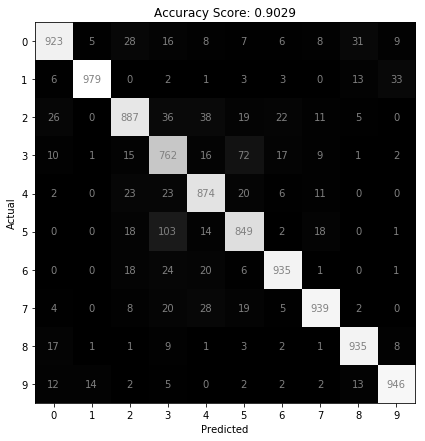

In [30]:
runner.validate(metrics=[ConfusionMatrix(plot=True, classes=10)])

In [ ]:
x, y = next(iter(test_loader))
x, y = x[None, 1], y[None, 1]
vx = Variable(x.cuda())
runner.cam(vx, -3, 512, 10)